#### 패키지 불러오기

In [2]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt

import matplotlib

# 데이터 scaling
from sklearn.preprocessing import StandardScaler
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 분류 NN (MLPClassifier)
from sklearn.neural_network import MLPClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.font_manager as fm
path='/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc'
fontprop=fm.FontProperties(fname=path, size=18).get_name()
matplotlib.rc('font',family = fontprop)
matplotlib.rc('axes', unicode_minus = False)

## 데이터 구성하기

In [4]:
# 데이터 불러오기
df_raw = pd.read_csv('오대오.csv')
df_raw.drop('Unnamed: 0',axis=1,inplace=True)




# 설명변수, 목표변수 데이터 지정
df_raw_x = df_raw.drop("cause", axis = 1, inplace = False)
df_raw_y = df_raw["cause"] 

# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, # 설명변수 데이터
                                                                df_raw_y, # 목표변수 데이터
                                                                test_size = 0.3, # test 데이터의 비율
                                                                random_state = 1234)  # random state

In [5]:
df_train_x = df_train_x.sample(frac = 0.05)
df_train_y = df_train_y.sample(frac = 0.05)
df_test_x  = df_test_x.sample(frac = 0.05)
df_test_y  = df_test_y.sample(frac = 0.05)

In [6]:
df_train_x

,TAG_001,TAG_002,TAG_004,TAG_005,TAG_006,TAG_007,TAG_008,TAG_011,TAG_012,TAG_013,...,TAG_184,TAG_185,TAG_186,TAG_187,TAG_188,TAG_189,TAG_190,TAG_191,TAG_192,TAG_193
103894,14.803700,4.004144,4.051116,286.538496,0.000000,0.042686,0.0,100.0,92.702067,50.507339,...,45.816004,25.477669,38.816537,27.552981,28.382876,0.100585,0.183522,0.025921,0.005600,71.335459
75567,14.554525,3.756635,3.728251,105.464132,0.000000,16.708068,0.0,100.0,92.529045,51.127030,...,36.539791,39.207431,40.496715,38.671534,40.442776,0.097162,0.212903,0.053578,0.082929,67.511836
60880,14.092793,3.698867,3.696239,138.746132,0.000000,21.566610,0.0,100.0,92.042096,45.994624,...,40.125027,40.407977,40.448602,39.302328,38.621724,0.233282,0.198402,0.023812,0.035789,94.730590
30926,14.030185,3.535711,3.579584,31.058857,0.000000,7.838034,0.0,100.0,91.254224,50.231192,...,40.193263,39.527932,39.477115,39.840870,38.955160,0.172111,0.347234,0.021189,0.057533,28.680405
19919,14.270258,3.628512,3.573822,65.033978,11.163471,0.000000,0.0,100.0,91.071441,51.891969,...,43.214727,40.456045,42.325476,42.639030,40.405044,0.295267,0.148838,0.024798,0.056817,46.378491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73408,14.760356,3.744805,3.712929,87.958505,19.856806,0.000000,0.0,100.0,93.150387,55.265395,...,28.037186,33.399117,28.327640,39.138877,99.344938,0.138070,0.325155,0.030622,0.009050,69.426821
3657,14.746787,3.586033,3.650229,99.490309,19.835574,0.000000,0.0,100.0,91.517988,45.222312,...,39.892249,42.970714,39.925935,39.935453,37.296182,0.098284,0.221689,0.059466,0.025887,55.221776
73899,14.237226,3.792498,3.727306,230.492881,0.000000,36.223374,0.0,100.0,90.713439,47.746014,...,39.759610,39.587011,40.414402,39.752249,40.696623,0.208194,0.223344,0.026401,0.057496,27.579859
71399,14.713680,3.722798,3.781501,194.954266,41.235499,0.000000,0.0,100.0,91.075005,46.719748,...,39.341921,39.873297,40.537537,40.137732,40.334035,0.307793,0.090136,0.066544,0.057339,47.103182


## 모델 생성

#### 기본 옵션으로 NN 모델 생성

In [7]:
nn_uncustomized = MLPClassifier(hidden_layer_sizes=(100,),random_state=1234)
# nn_uncustomized = MLPClassifier(random_state=1234, hidden_layer_sizes=(100,))
nn_uncustomized.fit(df_train_x, df_train_y)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(nn_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(nn_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.493
Accuracy on test set: 0.496


In [8]:
# 실행옵션 확인
print(nn_uncustomized.get_params().keys())
print(nn_uncustomized.get_params().values())

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])
dict_values(['relu', 0.0001, 'auto', 0.9, 0.999, False, 1e-08, (100,), 'constant', 0.001, 15000, 200, 0.9, 10, True, 0.5, 1234, True, 'adam', 0.0001, 0.1, False, False])


#### Hidden Layer : 은닉층 변경

In [9]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
para_hidden = [5 * hidden for hidden in range(1, 21)]  # 은닉층 노드 : 5~100

print(para_hidden)

for v_hidden in para_hidden:
#     nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state = 1234) # 은닉층 : 1D (5,), (10,)...
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden,v_hidden), random_state = 1234) # 은닉층 : 2D (5,5), (10,10)...
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


In [10]:
# 은닉층별 정확도 테이블
df_accuracy_hidden.round(3)

,HiddenLayer,TrainAccuracy,TestAccuracy
0,5,0.490,0.499
1,10,0.503,0.499
2,15,0.487,0.495
3,20,0.506,0.504
4,25,0.510,0.499
5,30,0.520,0.490
6,35,0.506,0.481
7,40,0.492,0.497
8,45,0.494,0.484
9,50,0.507,0.503


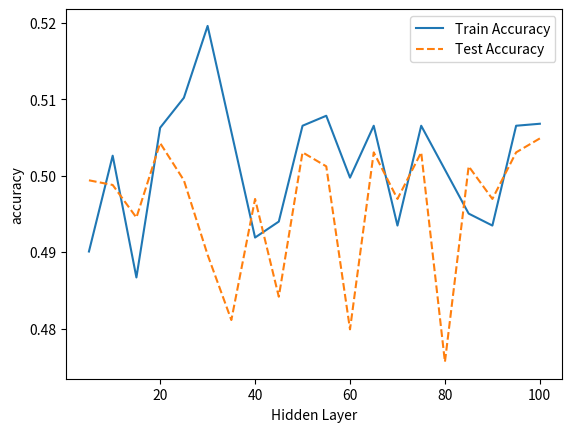

In [11]:
# 정확도 그래프 표현
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Hidden Layer")
plt.legend()

#### Activation : 활성화 함수 변경

In [12]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# activation 변경 
para_function = ["logistic", "tanh", "relu"]

for v_function in para_function:
    nn = MLPClassifier(activation = v_function, random_state = 1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy

In [13]:
para_function

['logistic', 'tanh', 'relu']

In [14]:
# Activation Function별 정확도 테이블
df_accuracy_function.round(3)

,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.515,0.51
1,tanh,0.485,0.49
2,relu,0.485,0.49


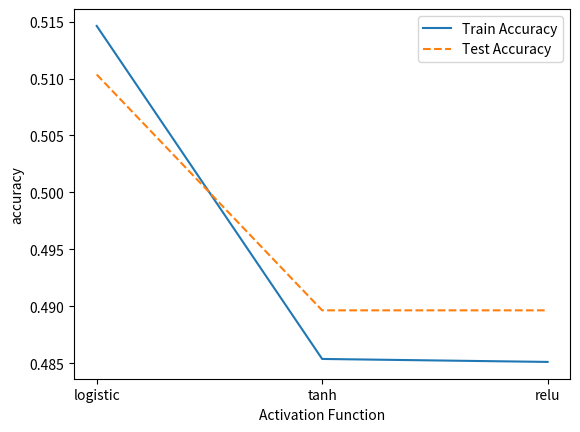

In [15]:
# 정확도 그래프 표현
plt.plot(para_function, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Activation Function")
plt.legend()

#### scale 변환

In [12]:
# 변수명 저장
v_feature_names = df_train_x.columns
# StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_names)
df_scaled.head()

,TAG_001,TAG_002,TAG_004,TAG_005,TAG_006,TAG_007,TAG_008,TAG_011,TAG_012,TAG_013,...,TAG_184,TAG_185,TAG_186,TAG_187,TAG_188,TAG_189,TAG_190,TAG_191,TAG_192,TAG_193
0,0.216596,0.054474,-0.452474,-0.940043,-0.572529,0.104948,-0.118705,0.012114,-0.423594,-1.559539,...,0.242051,0.467052,0.182057,0.465136,0.098734,-1.087988,1.125972,6.600369,-1.275388,-0.400098
1,0.035256,1.046411,0.729001,-1.789895,-0.572529,-0.654134,-0.118705,0.012114,1.177593,1.513367,...,0.220437,0.462343,-0.973282,-2.767366,0.123942,-0.942780,0.841634,2.582715,-0.076066,2.117640
2,-0.126154,0.728530,0.918422,-0.170304,2.019939,-0.648806,-0.118705,0.012114,1.282274,0.963397,...,0.298367,0.446828,0.218753,0.529244,0.224001,3.101222,-0.709452,0.702284,-0.076066,0.560212
3,-0.798806,1.415509,1.156492,1.224535,-0.572529,1.842755,-0.118705,0.012114,-0.666127,0.224883,...,0.328204,-0.170951,0.234912,0.442820,0.177588,0.977996,-0.134221,-0.953879,-0.323061,-0.285466
4,-0.184796,-0.318548,-0.342745,-0.782610,-0.572529,0.206334,-0.118705,0.012114,0.622420,0.196295,...,0.248383,0.491616,0.264075,0.398551,0.157275,0.310631,1.958988,-0.256649,1.851826,-0.256458


In [13]:
# 데이터 분할
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.3,random_state = 1234)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("test data X size : {}".format(df_scaled_test_x.shape))

train data X size : (76608, 139)
test data X size : (32832, 139)


## 결론 도출

In [14]:
# 최종 모델
nn_final = MLPClassifier(hidden_layer_sizes=(80, 80), 
                         random_state = 1234)
nn_final.fit(df_train_x, df_train_y)

# 평가
y_pred = nn_final.predict(df_test_x)


# train 데이터 셋 정확도
print("Accucary on training set: {:.3f}".format(nn_final.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}\n".format(nn_final.score(df_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Accucary on training set: 0.501
Accuracy on test set: 0.476

Confusion matrix: 
[[277 539]
 [322 504]]
              precision    recall  f1-score   support

           0      0.462     0.339     0.392       816
           1      0.483     0.610     0.539       826

    accuracy                          0.476      1642
   macro avg      0.473     0.475     0.465      1642
weighted avg      0.473     0.476     0.466      1642

